# Numerical Integration II

This notebook follows TAK &sect; 3.3-3.4. You should also read &sect; 3.5.

## Topics covered

* Error terms for quadrature rules.
* Subdivision/Composite rules.
* Error terms for composite quadrature rules.

You should be sure that you can write code for your own composite integration rules.

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpmath import mp, iv

## Error terms for quadrature rules

### Error term for the midpoint rule

Suppose $f:[a,b] \to {\mathbb R}$ has two continuous derivatives. Let $m=\frac{a+b}{2}$ denote the midpoint of the interval. Then the midpoint rule uses $(b-a)f(m)$ as an approximation for $\int_a^b f(x)~dx.$

For $t \in [0,\frac{b-a}{2}]$ define
$$F(t)=\int_{m-t}^{m+t} f(x)~dx.$$
Then $F(0)=0$ and $F(\frac{b-a}{2})=\int_a^b f(x)~dx.$

We will use the Taylor Series expansion for $F$. First observe that by the Fundamental Theorem of Calculus,
$$F'(t)=\frac{d}{dt} \int_{m-t}^m f(x)~dx + \frac{d}{dt} \int_{m}^{m+t} f(x)~dx=f(m+t) + f(m-t).$$
In particular, $F'(0)=2 f(m)$. Then we have
$$F''(t)=f'(m+t) - f'(m-t) 
\quad \text{and} \quad
F^{(3)}(t)=f''(m+t) + f''(m-t).$$
In particular then $F''(0)=0$. 

Therefore, we have the Taylor approximation
$$F(t) = 2 f(m) t + \frac{F^{(3)}(y)}{6} t^3$$
for some $y$ between $t$ and $0$. Observe that $F^{(3)}(y)=f''(m+y) + f''(m-y).$ Since the second derivative is continuous, and the average 
$$\frac{f''(m+y) + f''(m-y)}{2}$$ 
lies between $f''(m-y)$ and $f''(m+y)$, by the intermediate value theorem, there is a $z$ between $m-y$ and $m+y$ such that 
$$f''(z) = \frac{f''(m+y) + f''(m-y)}{2}.$$
We therefore have that $2 F^{(3)}(y)=f''(z).$ Plugging into our Taylor approximation, we have shown that 
$$F(t) = 2 f(m) t + \frac{f''(z)}{3} t^3,$$
where $z$ is between $m-t$ and $m+t$. Applying this in the case of $t=\frac{b-a}{2}$, we see that 
$$\int_a^b f(x)~dx = F(\frac{b-a}{2}) = (b-a)\, f(\frac{b-a}{2}) + \frac{f''(z)}{24} (b-a)^3.$$

We have proven the following result:

<div style="background: #FFA; margin: 1em 0em; padding: 0.5em;">
<b>Theorem (Error for the midpoint rule).</b> If the second derivative of $f:[a,b] \to {\mathbb R}$ is continuous, then 
$$\int_a^b f(x)~dx - (b-a)\cdot f\left(\tfrac{b-a}{2}\right) = \frac{(b-a)^3}{24} f''(z)$$
for some $z \in (a,b)$.
</div>

The above result appears in TAK as equation (3.18) on page 55. Why do we use $h$? See the discussion there. A less exact way to formulate this result is that (under the conditions in the theorem), we have
$$\int_a^b f(x)~dx = (b-a) \cdot f\left(\tfrac{b-a}{2}\right) + {\mathcal O}(h^3) \quad \text{as $h \to 0$},$$
where $h=b-a$.

### Error term for the trapezoid rule

<div style="background: #FFA; margin: 1em 0em; padding: 0.5em;">
<b>Theorem (Error for the trapezoid rule).</b> If the second derivative of $f:[a,b] \to {\mathbb R}$ is continuous, then 
$$\int_a^b f(x)~dx - \tfrac{b-a}{2} \big(\,f(b)+f(a)\big) = \frac{-(b-a)^3}{12} f''(z)$$
for some $z \in (a,b)$.
</div>

### Error term for Simpson's rule

<div style="background: #FFA; margin: 1em 0em; padding: 0.5em;">
<b>Theorem (Error for the Simpson's rule).</b> If the fourth derivative of $f:[a,b] \to {\mathbb R}$ is continuous, then 
$$\int_a^b f(x)~dx - \tfrac{b-a}{6} \big(\,f(a) + 4\,f(\tfrac{a+b}{2})+f(b)\big) = \frac{-1}{90} \left(\tfrac{b-a}{2}\right)^5 f^{(4)}(z)$$
for some $z \in (a,b)$.
</div>

## Subdivision

We can improve the accuracy of any quadrature rule by dividing an interval into pieces. Consider the midpoint rule. Suppose we want to approximate 
$$\int_a^b f(x)~dx.$$
Suppose further we divide $[a,b]$ into $N$ equal size pieces. The endpoints of the subintervals will be 
$$a, a+h, a+2h, \ldots, a+Nh,$$
where $h$ is the length of the subintervals, $h=\frac{b-a}{N}$. The intervals we are interested in are $[a+jh, a+(j+1)h]$, for $j=0, \ldots, N-1$. The midpoints of these intervals are $a+(j+\tfrac{1}{2})h$. So the estimate we want to use for the integral is 
$$h \sum_{j=0}^{N-1} f\big(a+(j+\tfrac{1}{2})h\big).$$

We can compute the error in our integral estimate by first analyzing individual intervals. 
$$\int_{a+jh}^{a+(j+1)h} f(x)~dx - h\,f \big(a+(\,j+\tfrac{1}{2})h\big) = \frac{h^3}{24} f''(z_j)$$
for some $z_j \in \big(a+jh, a+(j+1)h\big).$ 

To simplify things, lets just say that we know that $|f''(x)|<M$ for each $x \in [a,b]$ and some $M > 0$. Then $|f''(z_j)| <M$ for each $j$. This gives a bound on on the absolute error over the interval which is independent of $j$:
$$\left|\int_{a+jh}^{a+(j+1)h} f(x)~dx - h\,f \big(a+(\,j+\tfrac{1}{2})h\big)\right| < \frac{h^3 }{24} M.$$
Adding these errors gives a bound on the absolute error for our approximation:
$$\left|\int_a^b f(x)~dx - h \sum_{j=0}^{N-1} f\big(a+(j+\tfrac{1}{2})h\big)\right| < N \cdot \frac{h^3 }{24} M.$$
Recalling that $h=(b-a)/n$, we can simplify the error term:
$$N \cdot \frac{h^3 }{24} M = N \cdot \frac{(b-a)^3 M}{24 N^3}= \frac{(b-a)^3 M}{24 N^2}.$$
Thus, the error term shrinks rapidly as $N$ increases: Doubling $N$ decreases our bound on the error by a factor of $1/4$. We can formalize our estimate below:

<div style="background: #FFA; margin: 1em 0em; padding: 0.5em;">
<b>Theorem (Error for the Composite Midpoint Rule).</b> 
Assume $f$ has a continuous second derivative on $[a,b]$. Then 
$$\int_a^b f(x)~dx = h \sum_{j=0}^{N-1} f\big(a+(\,j+\tfrac{1}{2})h\big) + {\mathcal O}(\tfrac{1}{N^2})
\quad \text{as $N \to \infty$},$$
where $h=(b-a)/N.$ A more precise bound on the absolute value of the error is $\frac{(b-a)^3 M}{24 N^2}$ where $M$ is a bound on $|f''(x)|$ with $x \in [a,b]$.
</div>

## Code for the composite midpoint rule

Here is a general midpoint rule implementation for approximating 
$$\int_a^b f(x)~dx$$
using $N$ intervals $[a,b]$:

In [2]:
def midpoint_rule(f, a, b, N):
    # total will store the sum of the function
    # evaluated over the midpoints.
    total = 0.0
    h = (b-a)/N
    for j in range(N):
        total += f(a + (j+0.5)*h)
    return h*total

**Remark.** The above is an implementation in Python 3 without using any libraries. The book TAK implements the same algorithm using `numpy`. See page 60.

### Example

Define 
$$f(x)=\frac{16 x - 16}{x^4 - 2 y^3 + 4y - 4}.$$
It turns out that 
$$\pi = \int_0^1 f(x)~dx.$$
Let us use the midpoint rule to estimate $\pi$ for $N=2^k$ intervals. 
First we plot $f$:

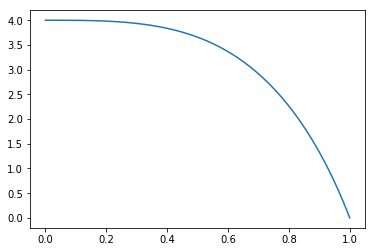

In [3]:
f = lambda x: (16*x-16)/(x**4 - 2*x**3 + 4*x -4)
x = np.linspace(0,1)
plt.plot(x,f(x))
plt.show()

Below we print out the estimate and errors for each $k$. We also store off the values into lists for plotting below.

In [4]:
k_list = []
err_list = []
for k in range(0,11):
    N = 2**k
    estimate = midpoint_rule(f, 0, 1, N)
    abs_error = abs(estimate - m.pi)
    print("N={} est={} err={}".format(N,estimate,abs_error))
    k_list.append(k)
    err_list.append(abs_error)    

N=1 est=3.657142857142857 err=0.5155502035530639
N=2 est=3.2913983994719906 err=0.14980574588219753
N=4 est=3.181774915934729 err=0.040182262344935715
N=8 est=3.151904308497749 err=0.010311654907956047
N=16 est=3.144190011306492 err=0.0025973577166986672
N=32 est=3.142243265536135 err=0.0006506119463418614
N=64 est=3.141755387082479 err=0.00016273349268569604
N=128 est=3.1416333420101683 err=4.068842037519005e-05
N=256 est=3.1416028260105815 err=1.01724207883791e-05
N=512 est=3.141595196714728 err=2.543124935083796e-06
N=1024 est=3.1415932893722527 err=6.357824595681905e-07


Here is a plot of the pairs `(k, abs_error)`. 

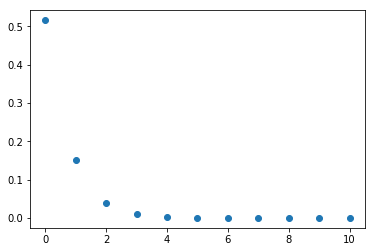

In [5]:
# Plot points (k, log_4 abs_error)
plt.plot(k_list,err_list,"o")
plt.show()

It is hard to see the difference in values with $k>4$. To see better we can plot the logarithm of the values. Here we plot pairs
$$(k, \log_4 E_k)$$
where $E_k$ is the error when $N=2^k$. We chose a base of $4$ because we expect $E_k$ to decrease by a factor of $\frac{1}{4}$ when $k$ increases by one. Thus we expect
$$\log E_{k+1} \approx -1 + \log_4 E_k.$$
In other words, we expect to approximately see a line of slope $-1$.

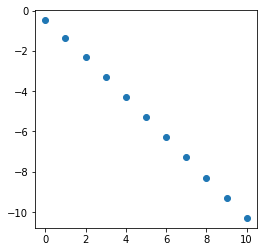

In [6]:
plt.axes().set_aspect('equal')
plt.plot(k_list,np.log(err_list)/np.log(4),"o")
plt.show()

## Composite Trapezoid Rule

To approximate $\int_a^b f(x)~dx$ over $[a,b]$ by dividing into $N$ equal-sized subintervals of length $h=\frac{b-a}{N}$ and using the trapezoid rule on each subinterval yields the approximation
$$\int_a^b f(x)~dx \approx h\left(\frac{f(a)+f(b)}{2}+\sum_{k=1}^{N-1} f(a+kh)\right).$$
The error term is very similar to the midpoint rule. It can be shown that 
$$\int_a^b f(x)~dx - h\left(\frac{f(a)+f(b)}{2}+\sum_{k=1}^{N-1} f(a+kh)\right)=\frac{-(b-a)^3 f''(y)}{12 N^2}$$
for some $y \in (a,b)$.

<div style="background: #FFA; margin: 1em 0em; padding: 0.5em;">
<b>Theorem (Error for the Composite Trapezoid Rule).</b> 
Assume $f$ has a continuous second derivative on $[a,b]$. Then 
$$\int_a^b f(x)~dx = h\left(\frac{f(a)+f(b)}{2}+\sum_{k=1}^{N-1} f(a+kh)\right) + {\mathcal O}(\tfrac{1}{N^2})
\quad \text{as $N \to \infty$},$$
where $h=(b-a)/N.$
A more precise bound on the absolute value of the error is $\frac{(b-a)^3 M}{12 N^2}$ where $M$ is a bound on $|f''(x)|$ with $x \in [a,b]$.
</div>

## Composite Simpson's Rule

We will now approximate $\int_a^b f(x)~dx$ over $[a,b]$ by dividing into $N$ equal-sized subintervals and applying Simpson's rule.
We define $h=\frac{b-a}{N}$ to be the length of the intervals. We number the intervals using $j \in \{0, 1, \ldots, N-1\}$, and then interval $j$ has the form $[a+jh,a+(j+1)h]$ with a midpoint of $a+(j+\frac{1}{2})h$. We obtain the approximation:
$$S_N= \frac{h}{6}
\sum_{j=0}^{N-1} \left[f(a+jh) + 4 f\big(a+(j+\frac{1}{2})h\big) + f\big(a+(j+1)h\big)\right].$$
Some of the endpoints appear multiple times in this formula, so simplifying the formula might give a slight computational advantage. The book has the simplification, see equation (3.26) on page 62.

We obtain an error term of the form
$$\int_a^b f(x)~dx - S_N = \frac{-(b-a)^4 h^4}{180} f^{(4)}(y)= \frac{-(b-a)^8}{180 N^4} f^{(4)}(y)$$
for some $y \in (a,b)$. See Theorem 2 of TAK, page 64.

<div style="background: #FFA; margin: 1em 0em; padding: 0.5em;">
<b>Theorem (Error for the Composite Simpson's Rule).</b> 
Assume $f$ has a continuous second derivative on $[a,b]$. Then 
$$\int_a^b f(x)~dx = S_N + {\mathcal O}(\tfrac{1}{N^4})
\quad \text{as $N \to \infty$},$$
where $h=(b-a)/N.$
A more precise bound on the absolute value of the error is $\frac{(b-a)^8 M}{180 N^4}$ where $M$ is a bound on $|f^{(4)}(x)|$ with $x \in [a,b]$.
</div>

### Example

We'll again try to estimate $\pi$ using the integral approximation described above. Here is a general function for applying Simpson's rule with $N$ subintervals:

In [7]:
def simpsons_rule(f, a, b, N):
    total = 0.0
    h = (b-a)/N
    for j in range(N):
        total += f(a+j*h) + 4*f(a+(j+0.5)*h) + f(a+(j+1)*h)
    return h/6 * total

In [8]:
k_list = []
err_list = []
for k in range(0,11):
    N = 2**k
    estimate = simpsons_rule(f, 0, 1, N)
    abs_error = abs(estimate - m.pi)
    print("N={} est={} err={}".format(N,estimate,abs_error))
    k_list.append(k)
    err_list.append(abs_error)    

N=1 est=3.1047619047619044 err=0.036830748827888726
N=2 est=3.1371227425051367 err=0.004469911084656442
N=4 est=3.141178248630389 err=0.0004144049594039245
N=8 est=3.1415628439912386 err=2.9809598554475514e-05
N=16 est=3.141590711450322 err=1.9421394710228412e-06
N=32 est=3.1415925308648363 err=1.2272495686360685e-07
N=64 est=3.1415926458980494 err=7.691743686422114e-09
N=128 est=3.14159265310872 err=4.810729592463758e-10
N=256 est=3.141592653559718 err=3.007505355867579e-11
N=512 est=3.1415926535879155 err=1.8776091792460647e-12
N=1024 est=3.141592653589675 err=1.1812772982011666e-13


From the error formula, we expect that every time we double the number of intervals, we will decrease the error by a multiplicative factor of $\frac{1}{16}$. Below we plot pairs
$$(k,\log_{16} E_k),$$
where $E_k$ is the error obtained with $N=2^k$. Because of our choice of base, we expect to see a line of slope $-1$ again.

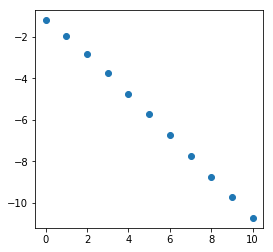

In [9]:
plt.axes().set_aspect('equal')
plt.plot(k_list,np.log(err_list)/np.log(16),"o")
plt.show()